# Mandelbrot set

## Formula $ z = z^2 + c $.

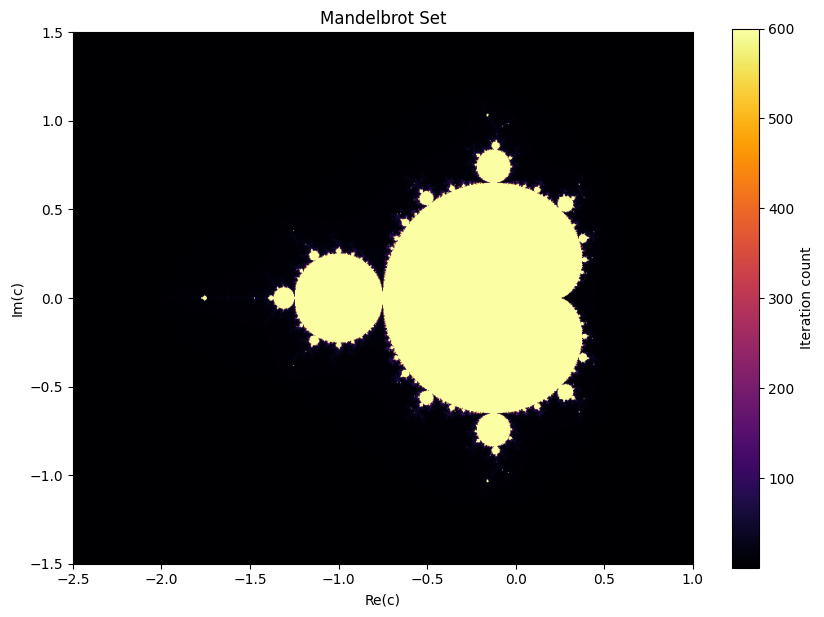

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector

def mandelbrot(h, w, max_iter, x_min, x_max, y_min, y_max):
    """Generate the Mandelbrot set for a grid of size h x w with max_iter iterations."""
    x = np.linspace(x_min, x_max, w)
    y = np.linspace(y_min, y_max, h)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y  # Complex grid
    Z = np.zeros_like(C, dtype=np.complex128)  # Initialize Z
    output = np.zeros_like(C, dtype=np.float64)  # Store iteration counts

    # Iterate to check for Mandelbrot set membership
    for i in range(max_iter):
        mask = np.abs(Z) <= 2  # Points still in consideration
        Z[mask] = Z[mask] * Z[mask] + C[mask]  # Update Z for points in set
        output += mask  # Increment iteration count for points still bounded

    return output

def update_plot(x_min, x_max, y_min, y_max, ax, fig, width, height, max_iter, cmap):
    """Update the plot with new boundaries and colormap."""
    ax.clear()
    mandel = mandelbrot(height, width, max_iter, x_min, x_max, y_min, y_max)
    ax.imshow(mandel, cmap=cmap, extent=(x_min, x_max, y_min, y_max))
    ax.set_title('Mandelbrot Set')
    ax.set_xlabel('Re(c)')
    ax.set_ylabel('Im(c)')
    fig.canvas.draw()

def onselect(eclick, erelease):
    """Handle rectangle selection for zooming."""
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    x_min, x_max = min(x1, x2), max(x1, x2)
    y_min, y_max = min(y1, y2), max(y1, y2)
    update_plot(x_min, x_max, y_min, y_max, ax, fig, width, height, max_iter, current_cmap)

# Parameters
width, height = 760, 800  # Image resolution
max_iter = 600  # Increased maximum iterations
initial_x_min, initial_x_max = -2.5, 1.0  # Initial complex plane boundaries
initial_y_min, initial_y_max = -1.5, 1.5
colormaps = ['inferno', 'hot', 'viridis', 'magma', 'plasma']  # Multiple colormaps
current_cmap = colormaps[0]  # Start with 'inferno'

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 7))
mandel = mandelbrot(height, width, max_iter, initial_x_min, initial_x_max, initial_y_min, initial_y_max)
img = ax.imshow(mandel, cmap=current_cmap, extent=(initial_x_min, initial_x_max, initial_y_min, initial_y_max))
plt.colorbar(img, ax=ax, label='Iteration count')
ax.set_title('Mandelbrot Set')
ax.set_xlabel('Re(c)')
ax.set_ylabel('Im(c)')

# Add interactive zooming with RectangleSelector
selector = RectangleSelector(ax, onselect, useblit=True, button=[1], minspanx=5, minspany=5, spancoords='pixels', interactive=True)

# Add key press event to cycle through colormaps
def on_key(event):
    global current_cmap
    if event.key == 'c':  # Press 'c' to cycle colormaps
        current_cmap = colormaps[(colormaps.index(current_cmap) + 1) % len(colormaps)]
        update_plot(ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1], ax, fig, width, height, max_iter, current_cmap)

fig.canvas.mpl_connect('key_press_event', on_key)

plt.show()

# This is the closest I could go. faced difficulty fixing pixels

![Screenshot 2025-10-19 011609.png](<attachment:Screenshot 2025-10-19 011609.png>)
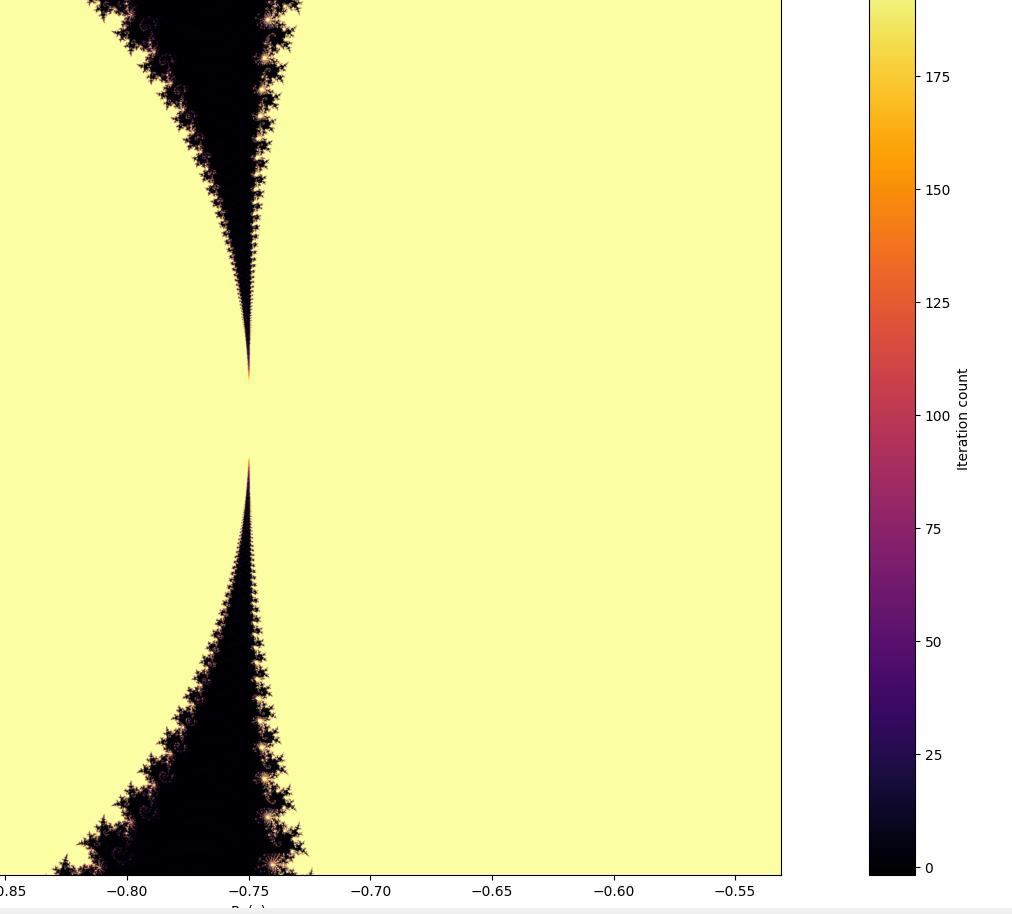